# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

L'obiettivo dell'esercizio è effettuare una simulazione di dinamica molecolare per studiare le proprietà e le caratteristiche dell'Argon in forma solida, liquida e gassosa. Per il moto delle particelle, il codice implementa l'algoritmo di Verlet, scelto poiché conserva meglio l'energia totale del sistema rispetto ad altri algoritmi visti (Eulero, Runge-Kutta, ecc.). Se l'energia è conservata, significa che ci troviamo nell'ensamble microcanonico, in cui la temperatura non è fissa. Poiché all'inizio della simulazione il sistema si trova in uno stato diverso da quello tipico della fase che vogliamo simulare a temperatura costante, esso evolverà; se l'energia potenziale cambia, cambierà anche quella cinetica (per conservazione dell'energia totale) e quindi la temperatura. In sintesi, quest'ultima cambierà fino a che il sistema non si equilibra a un differente valore. A livello pratico, ciò implica che dobbiamo saltare un numero sufficiente di step di dinamica prima di iniziare effettivamente a misurare le proprietà medie che ci interessano.

Come in tutte le esercitazioni, si è usata la tecnica della media a blocchi: fatto un certo numero di misure $N$, queste si suddividono in $N_{blocks}$​ blocchi da cui si estrae la media; mediando queste ultime si ottiene un risultato non affetto da correlazioni statistiche.

Per tutte e tre le fasi, si è prima studiato il sistema evolvendolo per un certo numero di step (2000 per solido e liquido, 10000 per gas) per capire a che punto avviene l'equilibrazione. Poi si è fatto ripartire ed evolvere per un numero sufficiente di blocchi da 2000 step ciascuno prima di iniziare a misurare, in modo da evitare misure del sistema fuori equilibrio; dopodiché si sono calcolate le grandezze fisiche usando 50 blocchi da 2000 misure ciascuno.

Nei grafici seguenti si possono dunque osservare tutte le grandezze fisiche richieste in funzione del numero di blocchi. Inoltre, nel grafico in alto a destra ho aggiunto la temperatura senza media progressiva dei blocchi (durante la fase di misura) per verificare che il sistema fosse effettivamente all'equilibrio: ciò è verificabile quando i dati oscillano intorno a un valore e non crescono o decrescono manifestamente.

NB. Si noti che:
- Non sono presenti le correzioni di coda all'energia potenziale e alla pressione implementate nell'esercitazione 7.
- Il codice è stato modificato nella funzione measure, da:
    ```cpp
        distance(0) = this->pbc( _particle(i).getposition(0,true) - _particle(j).getposition(0,true), 0);
        distance(1) = this->pbc( _particle(i).getposition(1,true) - _particle(j).getposition(1,true), 1);
        distance(2) = this->pbc( _particle(i).getposition(2,true) - _particle(j).getposition(2,true), 2);

    a

        distance(0) = this->pbc( _particle(i).getposition(0,false) - _particle(j).getposition(0,false), 0);
        distance(1) = this->pbc( _particle(i).getposition(1,false) - _particle(j).getposition(1,false), 1);
        distance(2) = this->pbc( _particle(i).getposition(2,false) - _particle(j).getposition(2,false), 2);
    ```
In questo modo le velocità calcolate nella funzione Verlet, corrispondono effettivamente all'istante di tempo corretto ($t$ e non $t-dt$).

### Fase solida

Ho usato il seguente input:

- TEMPERATURE= 1.541

- NPART= 108

- RHO= 1.1

- R_CUT= 2.2

- DELTA= 0.0005

- NBLOCKS= 50

- NSTEPS= 2000

- SALTA_NBLOCKS= 5

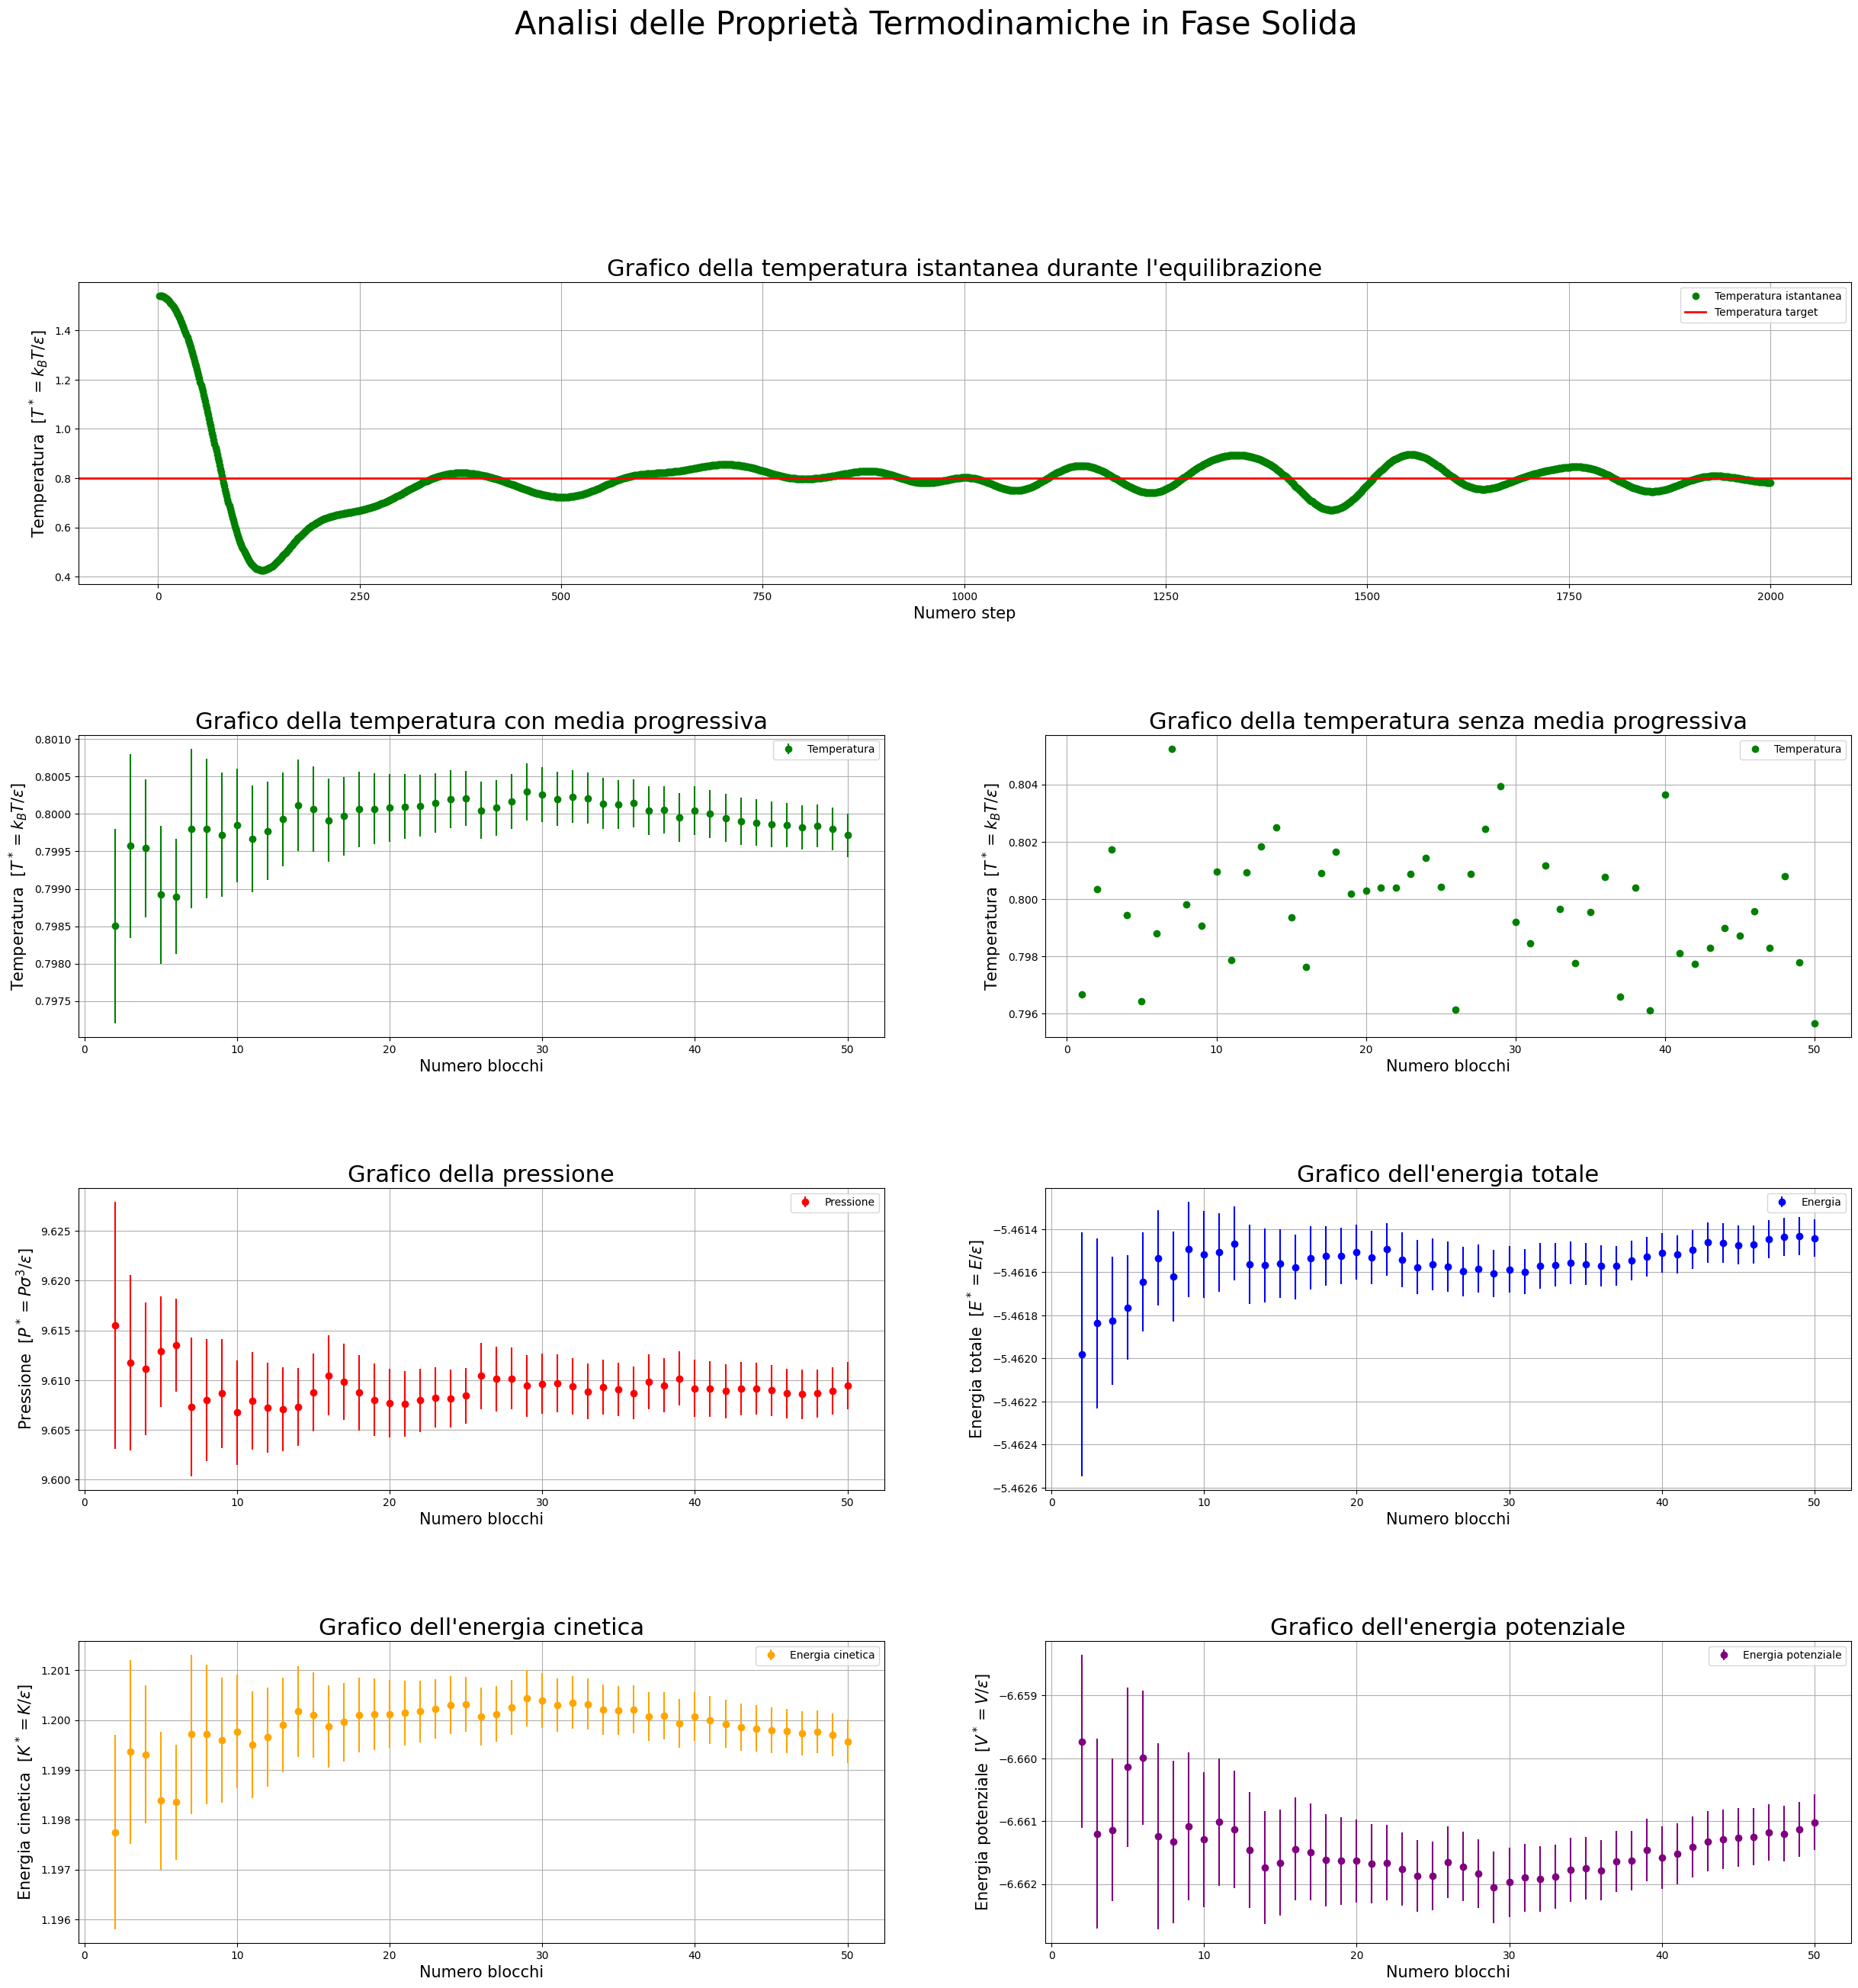

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Funzione per leggere i dati da un file
def leggi_dati_medi(file):
    dati = []
    with open(file, 'r') as f:
        next(f)
        next(f)  # Salta la prima riga
        for linea in f:
            valori = linea.strip().split()
            dati.append((float(valori[0]), float(valori[2]), float(valori[3])))
    return dati

def leggi_dati_ist(file):
    dati = []
    with open(file, 'r') as f:
        next(f)  # Salta la prima riga
        for linea in f:
            valori = linea.strip().split()
            dati.append((float(valori[0]), float(valori[1])))
    return dati

# Leggi i dati di pressione, temperatura ed errore
pressure_data = leggi_dati_medi('OUTPUT1/pressure.dat')
temperature_data_ist = leggi_dati_ist('OUTPUT1/temperature.dat')
temperature_data_media = leggi_dati_medi('OUTPUT1/temperature.dat')
energy_data = leggi_dati_medi('OUTPUT1/total_energy.dat')
kyneticenergy_data = leggi_dati_medi('OUTPUT1/kinetic_energy.dat')
potentialenergy_data = leggi_dati_medi('OUTPUT1/potential_energy.dat')

# Leggi i dati di temperatura istantanea per l'equilibrazione
equilibration_temperature_data = leggi_dati_ist('OUTPUT1/Equilibration/temperature.dat')

# Estrai le colonne
pressure_time, pressure_values, pressure_error = zip(*pressure_data)
temperature_media_time, temperature_media_values, temperature_media_error = zip(*temperature_data_media)
temperature_ist_time, temperature_ist_values = zip(*temperature_data_ist)
energy_time, energy_values, energy_error = zip(*energy_data)
kyneticenergy_time, kyneticenergy_values, kyneticenergy_error = zip(*kyneticenergy_data)
potentialenergy_time, potentialenergy_values, potentialenergy_error = zip(*potentialenergy_data)

# Estrai i dati di equilibrazione della temperatura
equilibration_temperature_time, equilibration_temperature_values = zip(*equilibration_temperature_data)

# Crea una figura con un layout personalizzato usando gridspec
fig = plt.figure(figsize=(30, 36))
gs = gridspec.GridSpec(5, 2, height_ratios=[1, 1, 1, 1, 1])
plt.subplots_adjust(hspace=0.5)

# Grafico della temperatura istantanea durante l'equilibrazione
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(equilibration_temperature_time, equilibration_temperature_values, marker='o', linestyle='', label='Temperatura istantanea', color='green')
ax1.axhline(y=0.8, color='red', linestyle='-', linewidth=2, label='Temperatura target')
ax1.set_title('Grafico della temperatura istantanea durante l\'equilibrazione', fontsize=22)
ax1.set_xlabel('Numero step', fontsize=15)
ax1.set_ylabel(r'Temperatura  [$T^*=k_B T/\epsilon$]', fontsize=15)
ax1.legend()
ax1.grid(True)

# Grafico della temperatura media
ax2 = fig.add_subplot(gs[1, 0])
ax2.errorbar(temperature_media_time, temperature_media_values, yerr=temperature_media_error, fmt='o', label='Temperatura', color='green')
ax2.set_title('Grafico della temperatura con media progressiva', fontsize=22)
ax2.set_xlabel('Numero blocchi', fontsize=15)
ax2.set_ylabel(r'Temperatura  [$T^*=k_B T/\epsilon$]', fontsize=15)
ax2.legend()
ax2.grid(True)

# Grafico della temperatura istantanea
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(temperature_ist_time, temperature_ist_values, marker='o', linestyle='', label='Temperatura', color='green')
ax3.set_title('Grafico della temperatura senza media progressiva', fontsize=22)
ax3.set_xlabel('Numero blocchi', fontsize=15)
ax3.set_ylabel(r'Temperatura  [$T^*=k_B T/\epsilon$]', fontsize=15)
ax3.legend()
ax3.grid(True)

# Grafico della pressione
ax4 = fig.add_subplot(gs[2, 0])
ax4.errorbar(pressure_time, pressure_values, yerr=pressure_error, fmt='o', label='Pressione', color='red')
ax4.set_title('Grafico della pressione', fontsize=22)
ax4.set_xlabel('Numero blocchi', fontsize=15)
ax4.set_ylabel(r'Pressione  [$P^*=P\sigma^3/\epsilon$]', fontsize=15)
ax4.legend()
ax4.grid(True)

# Grafico della energia
ax5 = fig.add_subplot(gs[2, 1])
ax5.errorbar(energy_time, energy_values, yerr=energy_error, fmt='o', label='Energia', color='blue')
ax5.set_title('Grafico dell\'energia totale', fontsize=22)
ax5.set_xlabel('Numero blocchi', fontsize=15)
ax5.set_ylabel(r'Energia totale  [$E^*=E/\epsilon$]', fontsize=15)
ax5.legend()
ax5.grid(True)

# Grafico dell'energia cinetica
ax6 = fig.add_subplot(gs[3, 0])
ax6.errorbar(kyneticenergy_time, kyneticenergy_values, yerr=kyneticenergy_error, fmt='o', label='Energia cinetica', color='orange')
ax6.set_title('Grafico dell\'energia cinetica', fontsize=22)
ax6.set_xlabel('Numero blocchi', fontsize=15)
ax6.set_ylabel(r'Energia cinetica  [$K^*=K/\epsilon$]', fontsize=15)
ax6.legend()
ax6.grid(True)

# Grafico dell'energia potenziale
ax7 = fig.add_subplot(gs[3, 1])
ax7.errorbar(potentialenergy_time, potentialenergy_values, yerr=potentialenergy_error, fmt='o', label='Energia potenziale', color='purple')
ax7.set_title('Grafico dell\'energia potenziale', fontsize=22)
ax7.set_xlabel('Numero blocchi', fontsize=15)
ax7.set_ylabel(r'Energia potenziale  [$V^*=V/\epsilon$]', fontsize=15)
ax7.legend()
ax7.grid(True)

fig.suptitle('Analisi delle Proprietà Termodinamiche in Fase Solida', fontsize=30)

# Mostra i grafici
plt.show()


Già dopo 500 step si vede che la temperatura inizia a oscillare intorno a quella target. Gli step saltati per la fase di misura (10000) sono eccessivi, tuttavia la simulazione non è computazionalmente onerosa dunque per sicurezza si è preferito saltare ulteriori step. 

Come si vede dai grafici, tutte le grandezze termodinamiche misurate convergono particolarmente bene e si nota chiaramente come l'energia totale si conserva (le fluttuazioni sono dell'ordine del $|5.46150-5.46275|/5.46200 \simeq 10^{-4} = 0.01\%$).

### Fase liquida

Ho usato il seguente input:

- TEMPERATURE= 1.986

- NPART= 108

- RHO= 0.8

- R_CUT= 2.5

- DELTA= 0.0005

- NBLOCKS= 50

- NSTEPS= 2000

- SALTA_NBLOCKS= 10

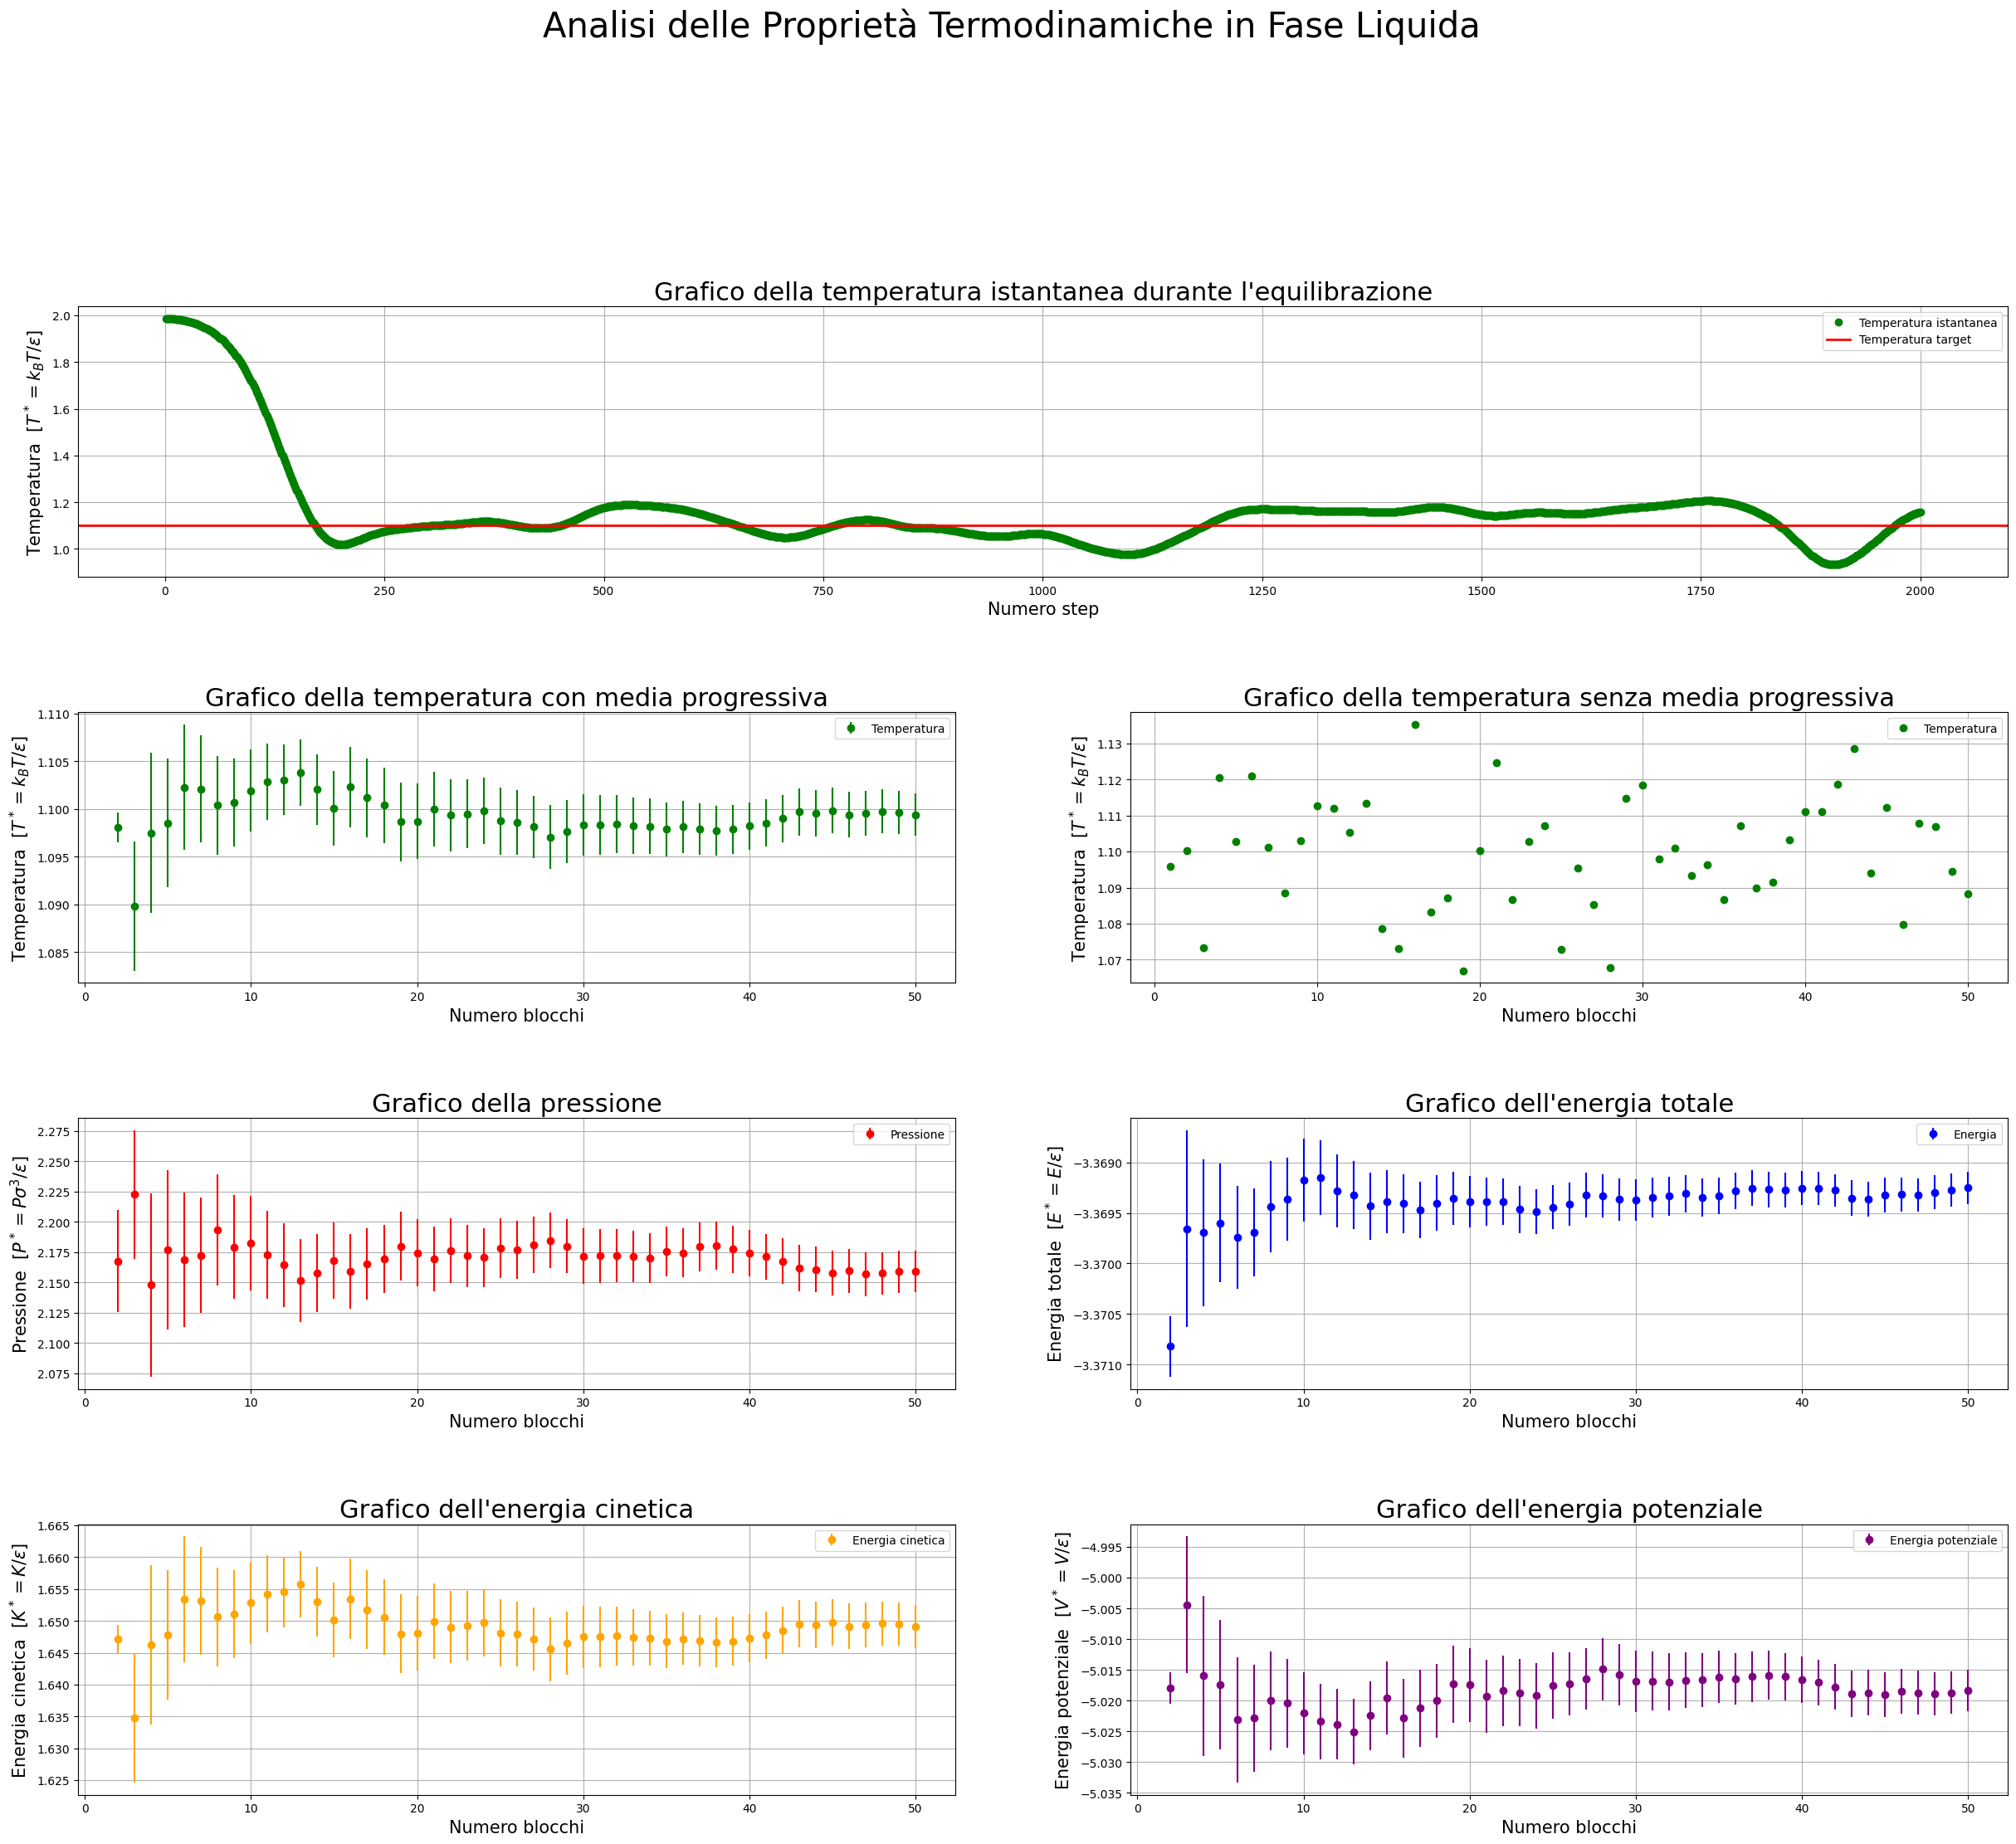

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Funzione per leggere i dati da un file
def leggi_dati_medi(file):
    dati = []
    with open(file, 'r') as f:
        next(f)
        next(f)  # Salta la prima riga
        for linea in f:
            valori = linea.strip().split()
            dati.append((float(valori[0]), float(valori[2]), float(valori[3])))
    return dati

def leggi_dati_ist(file):
    dati = []
    with open(file, 'r') as f:
        next(f)  # Salta la prima riga
        for linea in f:
            valori = linea.strip().split()
            dati.append((float(valori[0]), float(valori[1])))
    return dati

# Leggi i dati di pressione, temperatura ed errore
pressure_data = leggi_dati_medi('OUTPUT2/pressure.dat')
temperature_data_ist = leggi_dati_ist('OUTPUT2/temperature.dat')
temperature_data_media = leggi_dati_medi('OUTPUT2/temperature.dat')
energy_data = leggi_dati_medi('OUTPUT2/total_energy.dat')
kyneticenergy_data = leggi_dati_medi('OUTPUT2/kinetic_energy.dat')
potentialenergy_data = leggi_dati_medi('OUTPUT2/potential_energy.dat')

# Leggi i dati di temperatura istantanea per l'equilibrazione
equilibration_temperature_data = leggi_dati_ist('OUTPUT2/Equilibration/temperature.dat')

# Estrai le colonne
pressure_time, pressure_values, pressure_error = zip(*pressure_data)
temperature_media_time, temperature_media_values, temperature_media_error = zip(*temperature_data_media)
temperature_ist_time, temperature_ist_values = zip(*temperature_data_ist)
energy_time, energy_values, energy_error = zip(*energy_data)
kyneticenergy_time, kyneticenergy_values, kyneticenergy_error = zip(*kyneticenergy_data)
potentialenergy_time, potentialenergy_values, potentialenergy_error = zip(*potentialenergy_data)

# Estrai i dati di equilibrazione della temperatura
equilibration_temperature_time, equilibration_temperature_values = zip(*equilibration_temperature_data)

# Crea una figura con un layout personalizzato usando gridspec
fig = plt.figure(figsize=(30, 36))
gs = gridspec.GridSpec(6, 2, height_ratios=[1, 1, 1, 1, 1, 1])
plt.subplots_adjust(hspace=0.5)

# Grafico della temperatura istantanea durante l'equilibrazione
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(equilibration_temperature_time, equilibration_temperature_values, marker='o', linestyle='', label='Temperatura istantanea', color='green')
ax1.axhline(y=1.1, color='red', linestyle='-', linewidth=2, label='Temperatura target')
ax1.set_title('Grafico della temperatura istantanea durante l\'equilibrazione', fontsize=22)
ax1.set_xlabel('Numero step', fontsize=15)
ax1.set_ylabel(r'Temperatura  [$T^*=k_B T/\epsilon$]', fontsize=15)
ax1.legend()
ax1.grid(True)

# Grafico della temperatura media
ax2 = fig.add_subplot(gs[1, 0])
ax2.errorbar(temperature_media_time, temperature_media_values, yerr=temperature_media_error, fmt='o', label='Temperatura', color='green')
ax2.set_title('Grafico della temperatura con media progressiva', fontsize=22)
ax2.set_xlabel('Numero blocchi', fontsize=15)
ax2.set_ylabel(r'Temperatura  [$T^*=k_B T/\epsilon$]', fontsize=15)
ax2.legend()
ax2.grid(True)

# Grafico della temperatura istantanea
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(temperature_ist_time, temperature_ist_values, marker='o', linestyle='', label='Temperatura', color='green')
ax3.set_title('Grafico della temperatura senza media progressiva', fontsize=22)
ax3.set_xlabel('Numero blocchi', fontsize=15)
ax3.set_ylabel(r'Temperatura  [$T^*=k_B T/\epsilon$]', fontsize=15)
ax3.legend()
ax3.grid(True)

# Grafico della pressione
ax4 = fig.add_subplot(gs[2, 0])
ax4.errorbar(pressure_time, pressure_values, yerr=pressure_error, fmt='o', label='Pressione', color='red')
ax4.set_title('Grafico della pressione', fontsize=22)
ax4.set_xlabel('Numero blocchi', fontsize=15)
ax4.set_ylabel(r'Pressione  [$P^*=P\sigma^3/\epsilon$]', fontsize=15)
ax4.legend()
ax4.grid(True)

# Grafico della energia
ax5 = fig.add_subplot(gs[2, 1])
ax5.errorbar(energy_time, energy_values, yerr=energy_error, fmt='o', label='Energia', color='blue')
ax5.set_title('Grafico dell\'energia totale', fontsize=22)
ax5.set_xlabel('Numero blocchi', fontsize=15)
ax5.set_ylabel(r'Energia totale  [$E^*=E/\epsilon$]', fontsize=15)
ax5.legend()
ax5.grid(True)

# Grafico dell'energia cinetica
ax6 = fig.add_subplot(gs[3, 0])
ax6.errorbar(kyneticenergy_time, kyneticenergy_values, yerr=kyneticenergy_error, fmt='o', label='Energia cinetica', color='orange')
ax6.set_title('Grafico dell\'energia cinetica', fontsize=22)
ax6.set_xlabel('Numero blocchi', fontsize=15)
ax6.set_ylabel(r'Energia cinetica  [$K^*=K/\epsilon$]', fontsize=15)
ax6.legend()
ax6.grid(True)

# Grafico dell'energia potenziale
ax7 = fig.add_subplot(gs[3, 1])
ax7.errorbar(potentialenergy_time, potentialenergy_values, yerr=potentialenergy_error, fmt='o', label='Energia potenziale', color='purple')
ax7.set_title('Grafico dell\'energia potenziale', fontsize=22)
ax7.set_xlabel('Numero blocchi', fontsize=15)
ax7.set_ylabel(r'Energia potenziale  [$V^*=V/\epsilon$]', fontsize=15)
ax7.legend()
ax7.grid(True)

fig.suptitle('Analisi delle Proprietà Termodinamiche in Fase Liquida', fontsize=30)

# Mostra i grafici
plt.show()


Come prima, il sistema dopo circa 500 step, risulta essere già equilibrato. Come prima però si è preferito saltare un numero di step molto superiori a questo valore.

Rispetto alla fase solida, qui l'incertezza statistica associata alle grandezze termodinamiche da calcolare è maggiore e questo è dato dal fatto che il sistema diventa più complicato da simulare. Tuttavia è evidente in tutti i grafici che le misure effettivamente convergono.

Anche in questo caso l'energia totale si conserva, a meno di fluttuazioni del $|3.369-3.371|/3.370 \simeq 10^{-4} = 0.01\%$.

### Fase gassosa

Ho usato il seguente input:

- TEMPERATURE= 0.95

- NPART= 108

- RHO= 0.05

- R_CUT= 5

- DELTA= 0.0005

- NBLOCKS= 50

- NSTEPS= 2000

- SALTA_NBLOCKS= 25

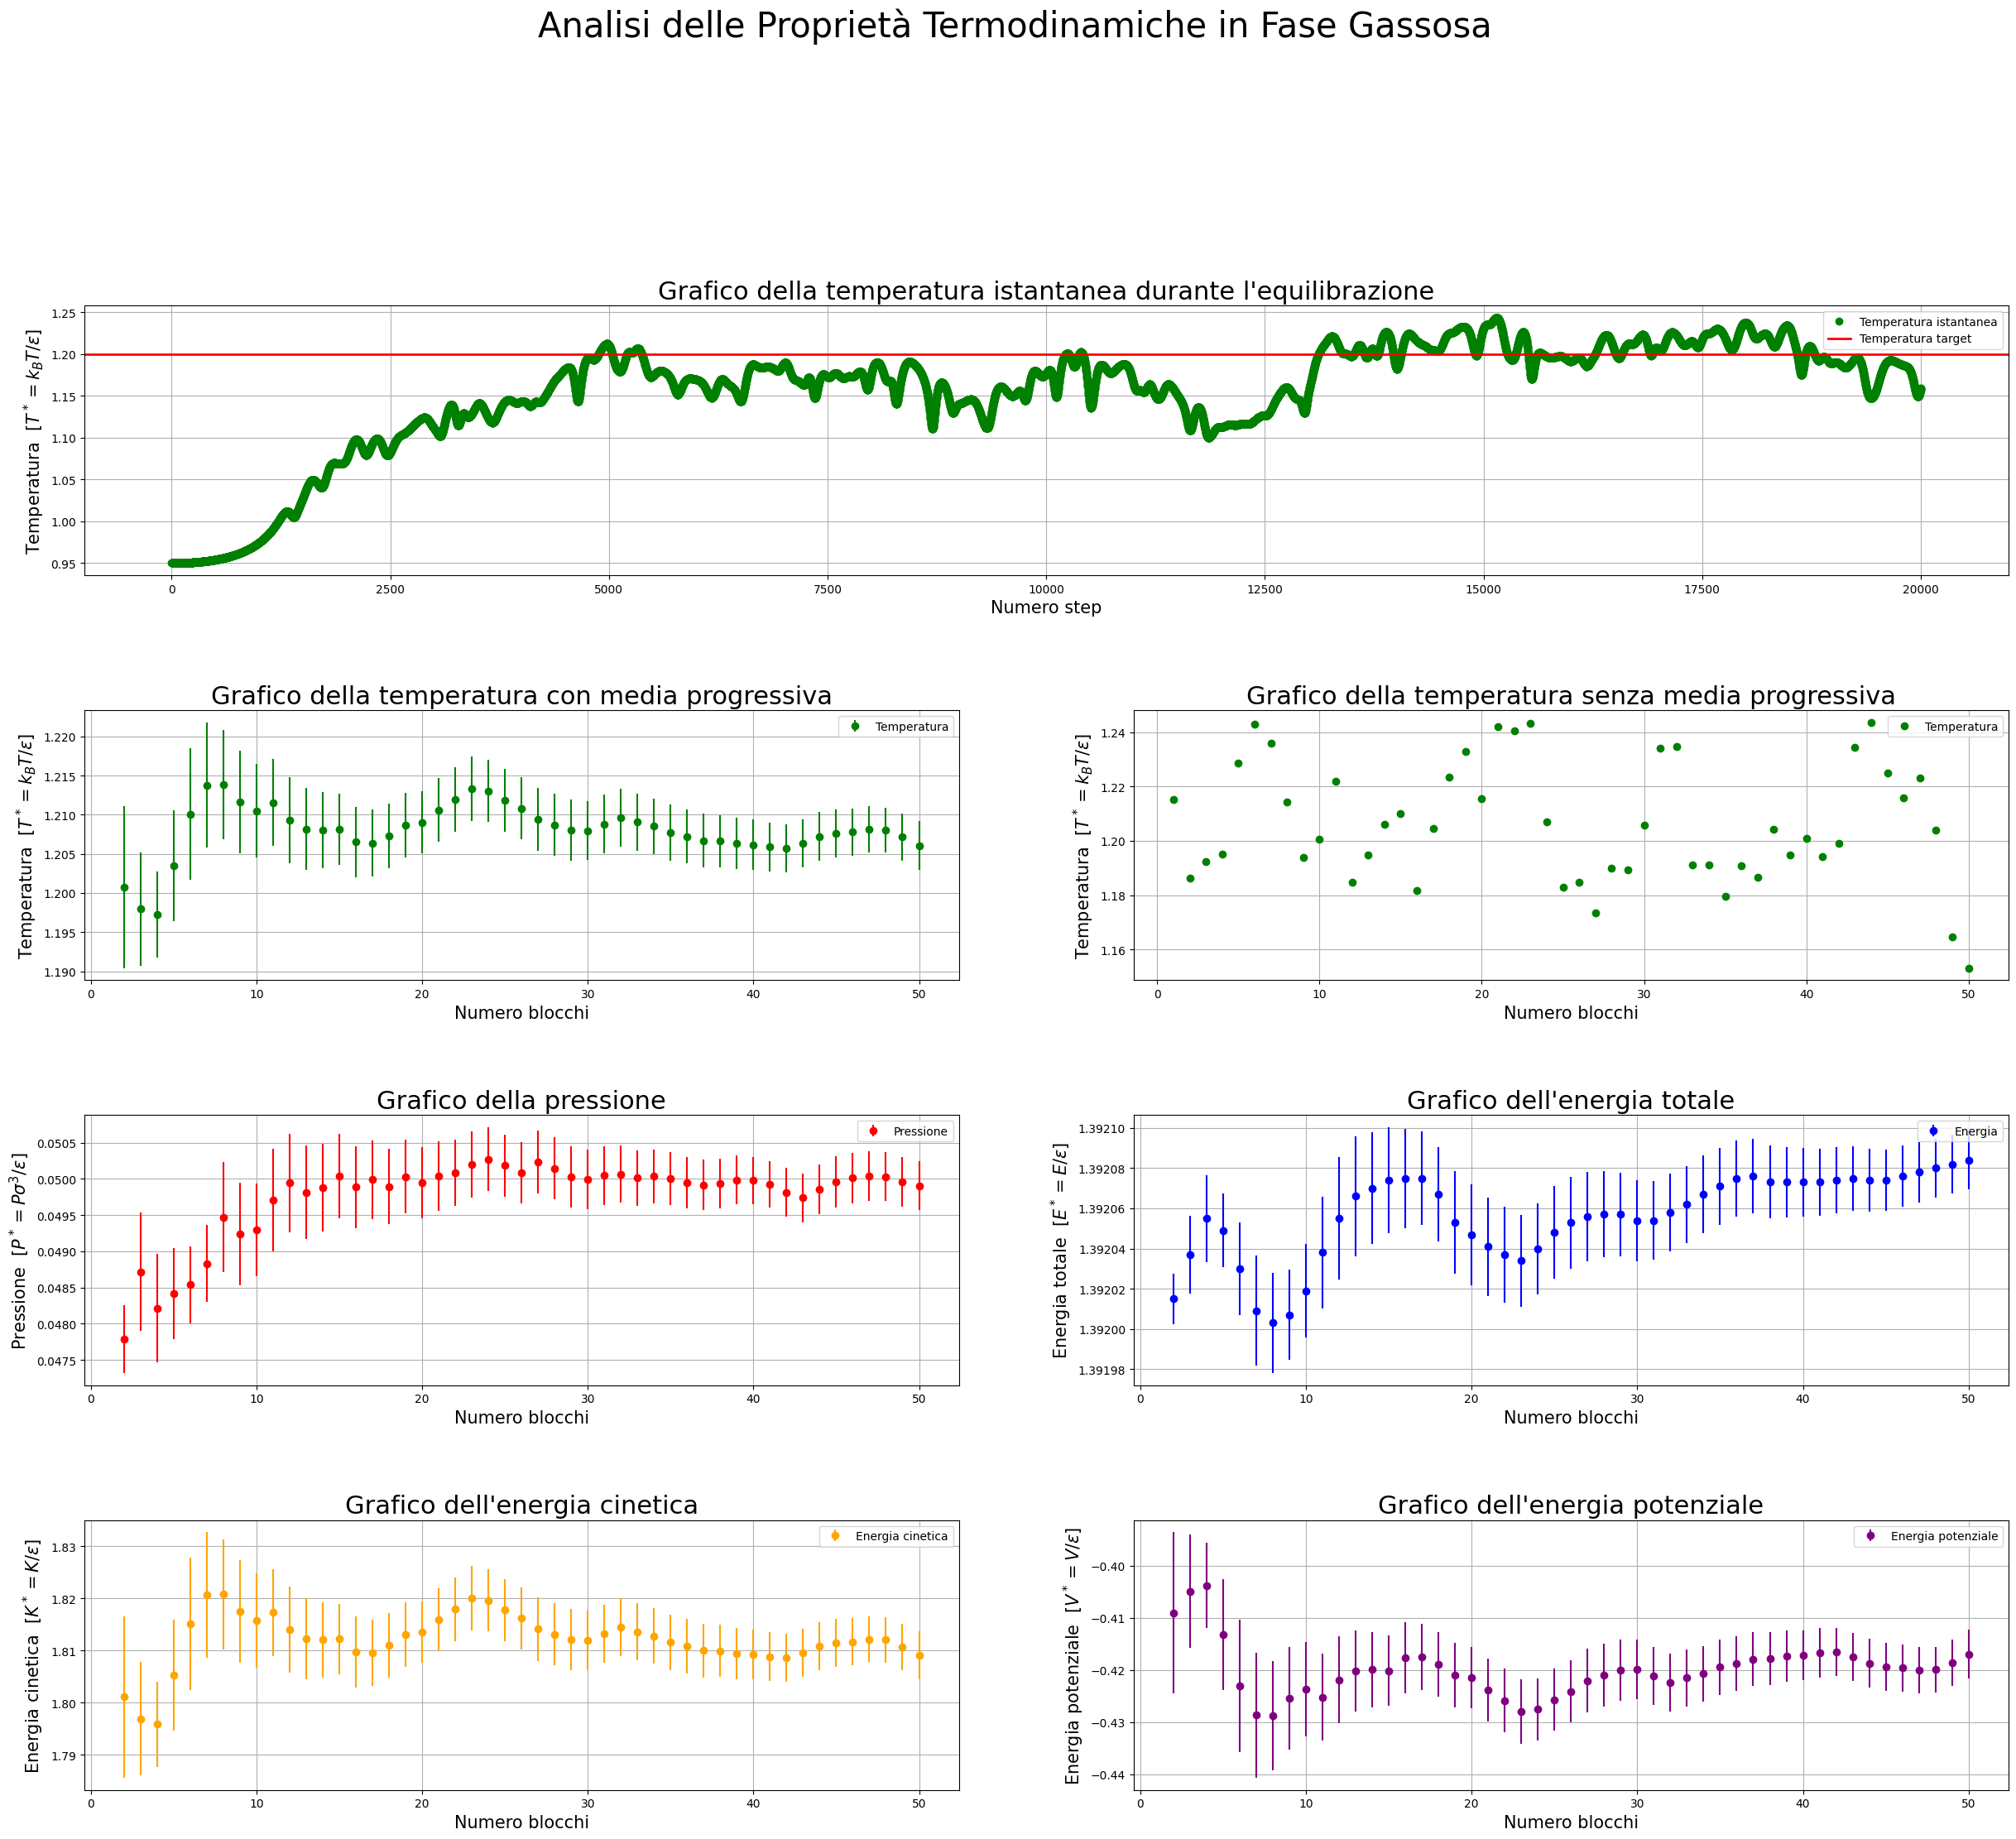

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Funzione per leggere i dati da un file
def leggi_dati_medi(file):
    dati = []
    with open(file, 'r') as f:
        next(f)
        next(f)  # Salta la prima riga
        for linea in f:
            valori = linea.strip().split()
            dati.append((float(valori[0]), float(valori[2]), float(valori[3])))
    return dati

def leggi_dati_ist(file):
    dati = []
    with open(file, 'r') as f:
        next(f)  # Salta la prima riga
        for linea in f:
            valori = linea.strip().split()
            dati.append((float(valori[0]), float(valori[1])))
    return dati

# Leggi i dati di pressione, temperatura ed errore
pressure_data = leggi_dati_medi('OUTPUT3/pressure.dat')
temperature_data_ist = leggi_dati_ist('OUTPUT3/temperature.dat')
temperature_data_media = leggi_dati_medi('OUTPUT3/temperature.dat')
energy_data = leggi_dati_medi('OUTPUT3/total_energy.dat')
kyneticenergy_data = leggi_dati_medi('OUTPUT3/kinetic_energy.dat')
potentialenergy_data = leggi_dati_medi('OUTPUT3/potential_energy.dat')

# Leggi i dati di temperatura istantanea per l'equilibrazione
equilibration_temperature_data = leggi_dati_ist('OUTPUT3/Equilibration/temperature.dat')

# Estrai le colonne
pressure_time, pressure_values, pressure_error = zip(*pressure_data)
temperature_media_time, temperature_media_values, temperature_media_error = zip(*temperature_data_media)
temperature_ist_time, temperature_ist_values = zip(*temperature_data_ist)
energy_time, energy_values, energy_error = zip(*energy_data)
kyneticenergy_time, kyneticenergy_values, kyneticenergy_error = zip(*kyneticenergy_data)
potentialenergy_time, potentialenergy_values, potentialenergy_error = zip(*potentialenergy_data)

# Estrai i dati di equilibrazione della temperatura
equilibration_temperature_time, equilibration_temperature_values = zip(*equilibration_temperature_data)

# Crea una figura con un layout personalizzato usando gridspec
fig = plt.figure(figsize=(30, 36))
gs = gridspec.GridSpec(6, 2, height_ratios=[1, 1, 1, 1, 1, 1])
plt.subplots_adjust(hspace=0.5)

# Grafico della temperatura istantanea durante l'equilibrazione
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(equilibration_temperature_time, equilibration_temperature_values, marker='o', linestyle='', label='Temperatura istantanea', color='green')
ax1.axhline(y=1.2, color='red', linestyle='-', linewidth=2, label='Temperatura target')
ax1.set_title('Grafico della temperatura istantanea durante l\'equilibrazione', fontsize=22)
ax1.set_xlabel('Numero step', fontsize=15)
ax1.set_ylabel(r'Temperatura  [$T^*=k_B T/\epsilon$]', fontsize=15)
ax1.legend()
ax1.grid(True)

# Grafico della temperatura media
ax2 = fig.add_subplot(gs[1, 0])
ax2.errorbar(temperature_media_time, temperature_media_values, yerr=temperature_media_error, fmt='o', label='Temperatura', color='green')
ax2.set_title('Grafico della temperatura con media progressiva', fontsize=22)
ax2.set_xlabel('Numero blocchi', fontsize=15)
ax2.set_ylabel(r'Temperatura  [$T^*=k_B T/\epsilon$]', fontsize=15)
ax2.legend()
ax2.grid(True)

# Grafico della temperatura istantanea
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(temperature_ist_time, temperature_ist_values, marker='o', linestyle='', label='Temperatura', color='green')
ax3.set_title('Grafico della temperatura senza media progressiva', fontsize=22)
ax3.set_xlabel('Numero blocchi', fontsize=15)
ax3.set_ylabel(r'Temperatura  [$T^*=k_B T/\epsilon$]', fontsize=15)
ax3.legend()
ax3.grid(True)

# Grafico della pressione
ax4 = fig.add_subplot(gs[2, 0])
ax4.errorbar(pressure_time, pressure_values, yerr=pressure_error, fmt='o', label='Pressione', color='red')
ax4.set_title('Grafico della pressione', fontsize=22)
ax4.set_xlabel('Numero blocchi', fontsize=15)
ax4.set_ylabel(r'Pressione  [$P^*=P\sigma^3/\epsilon$]', fontsize=15)
ax4.legend()
ax4.grid(True)

# Grafico della energia
ax5 = fig.add_subplot(gs[2, 1])
ax5.errorbar(energy_time, energy_values, yerr=energy_error, fmt='o', label='Energia', color='blue')
ax5.set_title('Grafico dell\'energia totale', fontsize=22)
ax5.set_xlabel('Numero blocchi', fontsize=15)
ax5.set_ylabel(r'Energia totale  [$E^*=E/\epsilon$]', fontsize=15)
ax5.legend()
ax5.grid(True)

# Grafico dell'energia cinetica
ax6 = fig.add_subplot(gs[3, 0])
ax6.errorbar(kyneticenergy_time, kyneticenergy_values, yerr=kyneticenergy_error, fmt='o', label='Energia cinetica', color='orange')
ax6.set_title('Grafico dell\'energia cinetica', fontsize=22)
ax6.set_xlabel('Numero blocchi', fontsize=15)
ax6.set_ylabel(r'Energia cinetica  [$K^*=K/\epsilon$]', fontsize=15)
ax6.legend()
ax6.grid(True)

# Grafico dell'energia potenziale
ax7 = fig.add_subplot(gs[3, 1])
ax7.errorbar(potentialenergy_time, potentialenergy_values, yerr=potentialenergy_error, fmt='o', label='Energia potenziale', color='purple')
ax7.set_title('Grafico dell\'energia potenziale', fontsize=22)
ax7.set_xlabel('Numero blocchi', fontsize=15)
ax7.set_ylabel(r'Energia potenziale  [$V^*=V/\epsilon$]', fontsize=15)
ax7.legend()
ax7.grid(True)

fig.suptitle('Analisi delle Proprietà Termodinamiche in Fase Gassosa', fontsize=30)

# Mostra i grafici
plt.show()


A differenza dei casi precedenti l'equilibrio termodinamico è raggiunto dopo un numero di step 10 volte superiore, dunque si è aumentato ancora di più il numero di step saltati per permettere l'equilibrazione; questo si può capire nel momento in cui si pensa alle particelle del gas come molto distanti e quindi poco interagenti. Da ciò consegue che il tempo tipico per il raggiungimento dell'equilibrio sarà maggiore.

L'energia totale in questo caso oscilla ma comunque con una variazione percentuale piccola $|1.39210-1.39198|/1.392\simeq 10^{-4} = 0.01\%$.

Una peculiarità della sola fase gassosa è che la temperatura all'equilibrio termodinamico risulta essere superiore a quella di partenza. Questo accade perchè il codice fa partire il sistema da una configurazione fcc con posizioni scritte rispetto al lato della box di simulazione (ad es. la coordinata x = 0.5 significa metà lato L) e questo viene dilatato in base alla densità di partenza; nel caso gassoso le particelle sono molto distanziate e, pensando al potenziale di Lennard-Jonson, vengono attirate verso la buca di potenziale. Diminuendo l'energia potenziale, aumenta quella cinetica e quindi la temperatura.

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>